### クラスタリング

In [2]:
import pandas as pd

df = pd.read_csv('./log.csv', index_col=0)
df.head()

,Recruit,Custom,Shirt,Accessory
0,0,57600,7470,1039
1,4780,69700,5720,0
2,0,44000,0,331
3,8180,43200,5910,775
4,46980,0,3270,499


In [3]:
df.describe()

,Recruit,Custom,Shirt,Accessory
count,100.000000,100.000000,100.00000,100.000000
mean,23931.200000,30164.000000,3229.90000,407.480000
std,20366.635485,23503.623275,2741.82034,496.458559
min,0.000000,0.000000,0.00000,0.000000
25%,0.000000,13300.000000,0.00000,0.000000
50%,27880.000000,27550.000000,3350.00000,249.000000
75%,39955.000000,46150.000000,4860.00000,628.250000
max,65180.000000,83700.000000,10750.00000,2463.000000


In [4]:
df.corr()

,Recruit,Custom,Shirt,Accessory
Recruit,1.000000,-0.554173,-0.405148,-0.283262
Custom,-0.554173,1.000000,0.371186,0.191235
Shirt,-0.405148,0.371186,1.000000,0.130626
Accessory,-0.283262,0.191235,0.130626,1.000000


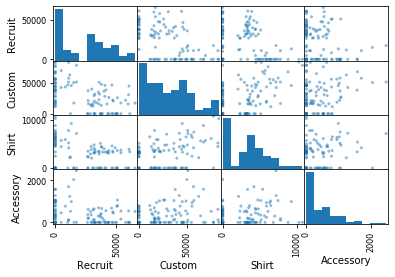

In [16]:
%matplotlib inline

from pandas.plotting import scatter_matrix
scatter_matrix(df);

#### クラスタリング
k-means法
- centroid : クラスターごとの中心
- label : クラスターのラベルの配置
- inertia : 中心との距離の自乗和

In [9]:
### クラスタリング
from sklearn.cluster import k_means

n_clusters = 2
centroid, label, inertia = k_means(df, n_clusters, random_state=0)
centroid, label, inertia

(array([[ 3878.18181818, 48025.        ,  4523.18181818,   611.47727273],
        [39687.14285714, 16130.35714286,  2213.75      ,   247.19642857]]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int32),
 39727838655.12175)

In [13]:
## クラス０
df0 = df[label == 0]
## クラス１
df1 = df[label == 1]

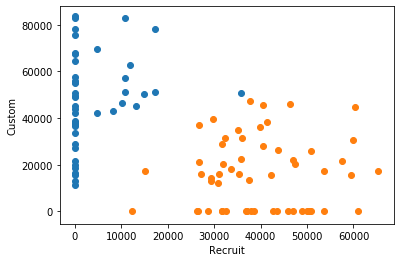

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

## Relation about Recruit & custom
plt.scatter(df0.Recruit, df0.Custom)
plt.scatter(df1.Recruit, df1.Custom)
plt.xlabel('Recruit')
plt.ylabel('Custom');

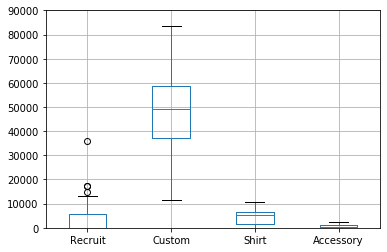

In [18]:
## ラベル0の箱ひげ図
plt.ylim(0, 90000)
df0.boxplot();

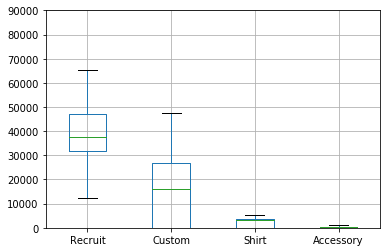

In [19]:
## ラベル1の箱ひげ図
plt.ylim(0, 90000)
df1.boxplot();